# Customer Region Classification

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


## Reading the Data 

In [2]:
cust = pd.read_csv('./DataSets/Customer.csv')
cust

,Customer ID,Customer Name,Segment,Age,Country,City,State,Postal Code,Region
0,CG-12520,Claire Gute,Consumer,67,United States,Henderson,Kentucky,42420,South
1,DV-13045,Darrin Van Huff,Corporate,31,United States,Los Angeles,California,90036,West
2,SO-20335,Sean O'Donnell,Consumer,65,United States,Fort Lauderdale,Florida,33311,South
3,BH-11710,Brosina Hoffman,Consumer,20,United States,Los Angeles,California,90032,West
4,AA-10480,Andrew Allen,Consumer,50,United States,Concord,North Carolina,28027,South
...,...,...,...,...,...,...,...,...,...
788,CJ-11875,Carl Jackson,Corporate,64,United States,Philadelphia,Pennsylvania,19140,East
789,RS-19870,Roy Skaria,Home Office,39,United States,Burlington,Iowa,52601,Central
790,SC-20845,Sung Chung,Consumer,69,United States,Arlington Heights,Illinois,60004,Central
791,RE-19405,Ricardo Emerson,Consumer,35,United States,Kent,Ohio,44240,East



## Understanding the Data 

In [3]:
cust.dtypes

Customer ID      object
Customer Name    object
Segment          object
Age               int64
Country          object
City             object
State            object
Postal Code       int64
Region           object
dtype: object

In [4]:
cust.shape

(793, 9)

In [5]:
cust.size

7137

In [6]:
cust.columns

Index(['Customer ID', 'Customer Name', 'Segment', 'Age', 'Country', 'City',
       'State', 'Postal Code', 'Region'],
      dtype='object')

In [7]:
cust.max()

Customer ID                ZD-21925
Customer Name    Zuschuss Donatelli
Segment                 Home Office
Age                              70
Country               United States
City                     Wilmington
State                     Wisconsin
Postal Code                   99207
Region                         West
dtype: object

In [8]:
cust.min()

Customer ID           AA-10315
Customer Name    Aaron Bergman
Segment               Consumer
Age                         18
Country          United States
City                     Akron
State                  Alabama
Postal Code               1841
Region                 Central
dtype: object

In [9]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer ID    793 non-null    object
 1   Customer Name  793 non-null    object
 2   Segment        793 non-null    object
 3   Age            793 non-null    int64 
 4   Country        793 non-null    object
 5   City           793 non-null    object
 6   State          793 non-null    object
 7   Postal Code    793 non-null    int64 
 8   Region         793 non-null    object
dtypes: int64(2), object(7)
memory usage: 55.9+ KB


In [10]:
cust.describe()

,Age,Postal Code
count,793.000000,793.000000
mean,44.467844,55229.717528
std,15.526673,31679.223816
min,18.000000,1841.000000
25%,31.000000,27217.000000
50%,45.000000,55901.000000
75%,58.000000,90004.000000
max,70.000000,99207.000000


In [11]:
cust.corr()

,Age,Postal Code
Age,1.000000,-0.019838
Postal Code,-0.019838,1.000000


In [12]:
cust.nunique()

Customer ID      793
Customer Name    793
Segment            3
Age               53
Country            1
City             252
State             41
Postal Code      314
Region             4
dtype: int64

In [13]:
# To detect the missing values
cust.isnull()

,Customer ID,Customer Name,Segment,Age,Country,City,State,Postal Code,Region
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
788,False,False,False,False,False,False,False,False,False
789,False,False,False,False,False,False,False,False,False
790,False,False,False,False,False,False,False,False,False
791,False,False,False,False,False,False,False,False,False



## Visualization 

<AxesSubplot:>

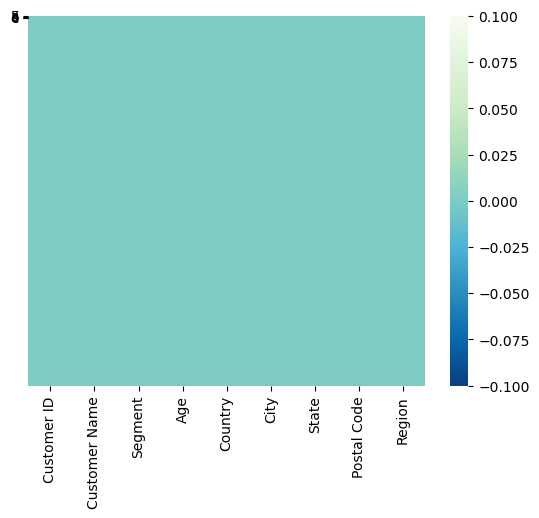

In [14]:
sns.heatmap(cust.isnull(), yticklabels = 'False', cmap = 'GnBu_r')

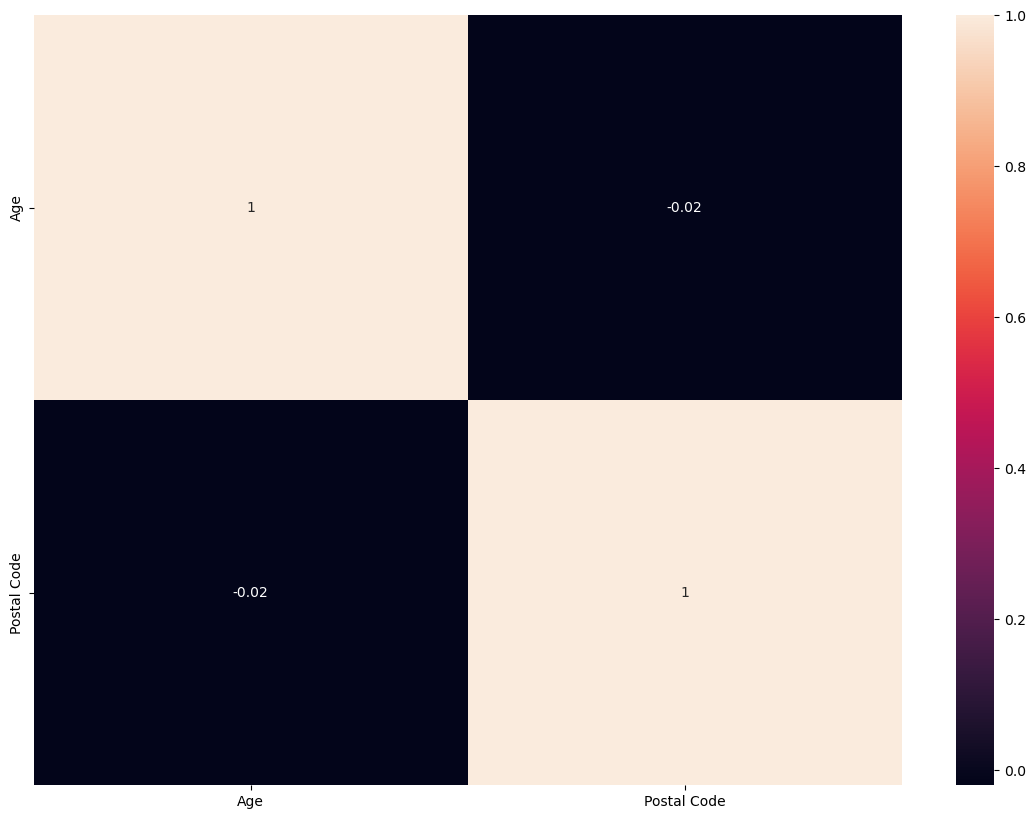

In [15]:
# Relation betwwen column attribute 
plt.figure(figsize=(14,10))
hm = sns.heatmap(cust.corr(), annot = True)
plt.show()

In [16]:
cust = cust.dropna()

<AxesSubplot:ylabel='Region'>

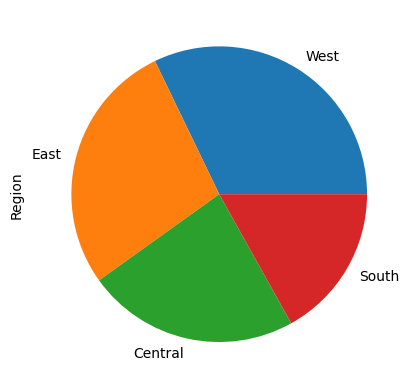

In [17]:
# Using seaborn to plot the count of 4 different Regions
cust.Region.value_counts().plot(kind='pie')

<AxesSubplot:xlabel='Region', ylabel='count'>

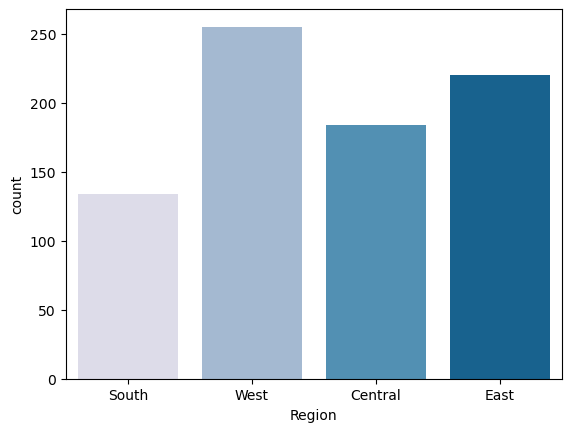

In [18]:
sns.countplot(x = cust['Region'], label = 'Count', palette = 'PuBu')

<AxesSubplot:xlabel='City', ylabel='State'>

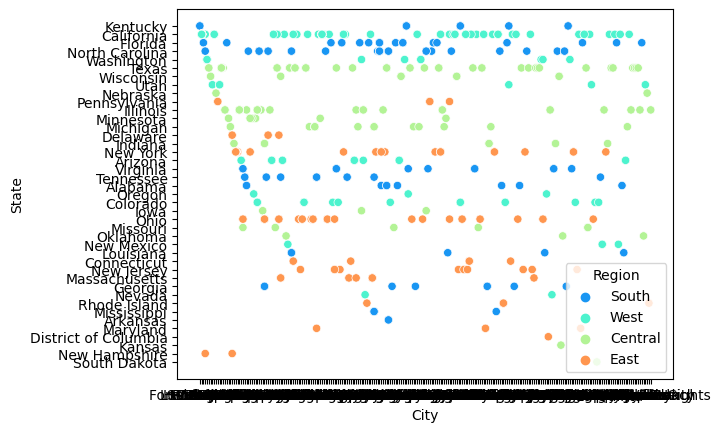

In [19]:
sns.scatterplot(x=cust['City'], y=cust['State'], hue = cust.Region, data = cust, palette = 'rainbow')


## Splitting the Data into Dependent and Independent Variables 

In [20]:
x = cust.iloc[:, -2:-1]
y = cust.iloc[:, -1]

In [21]:
x.shape

(793, 1)

In [22]:
x[:5]

,Postal Code
0,42420
1,90036
2,33311
3,90032
4,28027


In [23]:
y[:5]

0    South
1     West
2    South
3     West
4    South
Name: Region, dtype: object


## Training and Testing the Data 

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [25]:
# cust = cust.replace(r'^\s*$', np.nan, regex=True)
# cust = cust.replace({"^\s*|\s*$":""}, regex=True)
# cust = cust.replace({"":np.nan}) 
# cust

# 1. Decision Tree 

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 5)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=5)

### Prediction 

In [27]:
ypred_train = dt.predict(x_train)
ypred_test = dt.predict(x_test)


### Confusion Matrix 

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = np.array(confusion_matrix(ypred_test, y_test))
cm

array([[53,  0,  0,  0],
       [ 0, 51,  0,  0],
       [ 0,  0, 51,  0],
       [ 0,  0,  0, 83]], dtype=int64)

<AxesSubplot:>

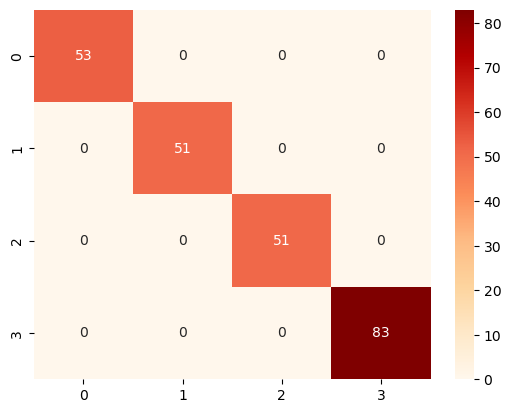

In [29]:
sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'OrRd', fmt = 'g')


### Accuracy 

In [30]:
print("Accuracy of Training Data: ", accuracy_score(y_train, ypred_train)*100)
ac = accuracy_score(y_test, ypred_test)*100
print('Accuracy of Testing Data: ',ac)

Accuracy of Training Data:  100.0
Accuracy of Testing Data:  100.0


# 2. Naive Bayes 

In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

### Prediction

In [32]:
ypred_train = gnb.predict(x_train)
ypred_test = gnb.predict(x_test)


### Confusion Matrix 

In [33]:
cm1 = np.array(confusion_matrix(ypred_test, y_test))
cm1

array([[49,  0,  4,  5],
       [ 0, 43, 21,  0],
       [ 4,  8, 26,  0],
       [ 0,  0,  0, 78]], dtype=int64)

<AxesSubplot:>

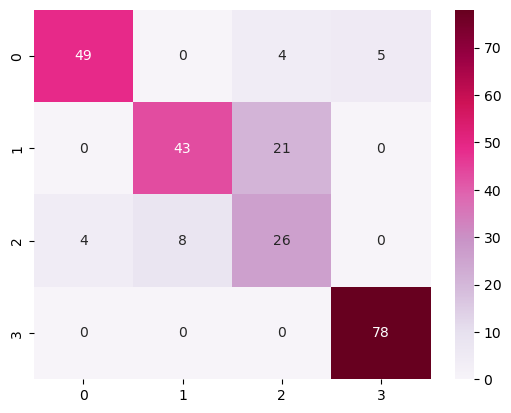

In [34]:
sns.heatmap(pd.DataFrame(cm1), annot = True, cmap = 'PuRd', fmt = 'g')

### Accuracy

In [35]:
print('Accuracy of Training Data: ', accuracy_score(ypred_train, y_train)*100)
ac1 = accuracy_score(y_test, ypred_test)*100
print('Accuracy of Testing Data: ', ac1)

Accuracy of Training Data:  84.68468468468468
Accuracy of Testing Data:  82.35294117647058



# 3. Random Forest Classifier 

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 5)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=5)


### Prediction

In [37]:
ypred_train = rf.predict(x_train)
ypred_test = rf.predict(x_test)


### Confusion Matrix 

In [38]:
cm2 = np.array(confusion_matrix(ypred_test, y_test))
cm2

array([[53,  0,  0,  0],
       [ 0, 51,  0,  0],
       [ 0,  0, 51,  0],
       [ 0,  0,  0, 83]], dtype=int64)

<AxesSubplot:>

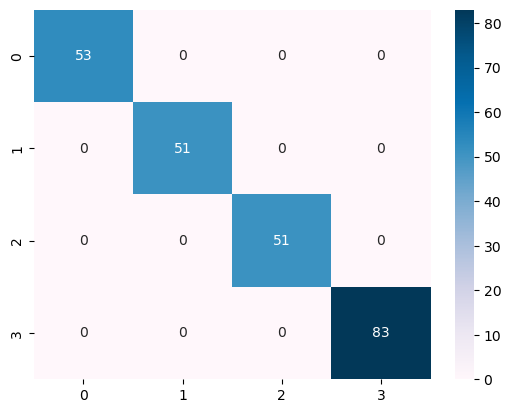

In [39]:
sns.heatmap(pd.DataFrame(cm2), annot = True, cmap = 'PuBu', fmt = 'g')

In [40]:
print('Accuracy of Traing Data: ', accuracy_score(y_train, ypred_train)*100)
ac2 = accuracy_score(y_test, ypred_test)*100
print('Accuracy of Testing Data: ', ac2)

Accuracy of Traing Data:  100.0
Accuracy of Testing Data:  100.0



# Comparision of Accuracy between Different Models 

In [41]:
accuracy = {ac:'Decision Tree', ac1:'Naive Bayes', ac2:'Random Forest Classifier'}

<AxesSubplot:>

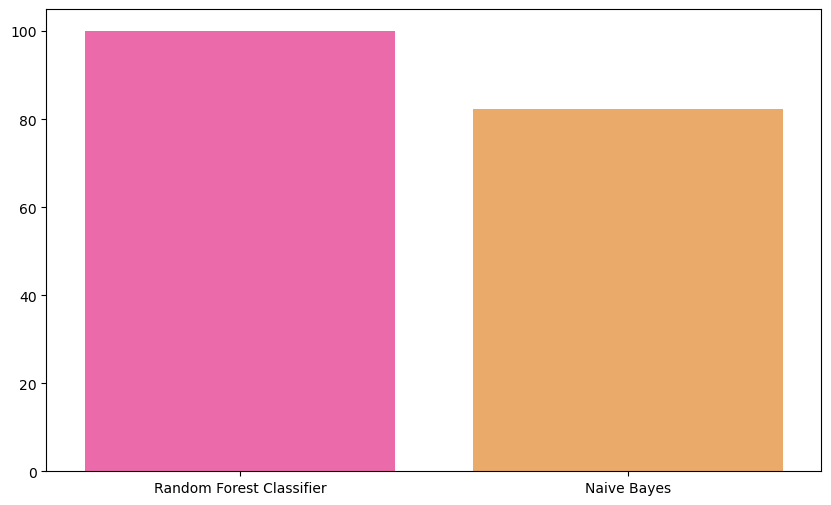

In [42]:
plt.figure(figsize = (10,6))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x = model_accuracies, y = model_names, palette = 'spring')


### Therefore, the model with the Highest Accuracy Score is Random Forest Classifier with an accuracy of 100.00